In [3]:
# imports
import plotly.express as px
from dash.dependencies import Output, Input
from dash import Dash, html, dcc
from jupyter_dash import JupyterDash
import pandas as pd
import numpy as np

# Layout of Dashboards

## html components

https://dash.plotly.com/dash-html-components

key takeaways:

 - you can use html.Markdown to display whole markdown text in one go
 - html.Span lets you change the style of pecific words within a sentence
 EG html.P(['hi my name', html.Span('is'), html.Span('Jeff')]

### HTML & MARKDOWN ASSIGNMENT

In [8]:
app = JupyterDash(__name__)


app.layout = html.Div(
    style={
        "font-family":"Arial", 
        "backgroundColor": "black", 
        "color": "lightGrey",
        "horizontal-align": "center",
#         "text-align": 'center'
    },
    children=[
        html.H1("Hello!!!"),
        html.P(
            ["Welcome to the ",
            html.Span("BEST", 
                      style={
                          "color": "Red", "font-weight": "Bold",  "fontSize": 32
                    }), 
            " website in the world!"
        ]),
        html.Br(),
        html.Div([
        dcc.Markdown('''
            # Section 1
            ### Shopping List
            * Apples
            * Salad Tongs
            * Jumbo Couch

            **Note to self**: Don't forget to bring shopping bag!
        '''),
        html.Br(),
        dcc.Markdown('''
            # Section 2
            ### Learning List
            1. Python
            2. More Python
            3. A bit of HTML

            **Note to self**: *Be kind to yourself if you get stuck.*
            ''', style={"color":"limegreen"}
        )
    ])
])


app.run_server(debug=True, mode="inline", port=8649)

Dash is running on http://127.0.0.1:8649/



### Styling DCC components

dcc components do not have the parent styles applied to them, so the parent styles need to be specified within them

In [18]:
url = r'/Users/chrismembrey/Desktop/DS/projects/plotly_dash_course/Course_Materials/Data/states_all.csv'

education = pd.read_csv(url).iloc[:, 1:]

app = JupyterDash(__name__)

my_dash_app_style = {
    "color": "lightgrey",
    "backgroundColor": "black",
    "font-family": "Arial"
}


app.layout = html.Div(
    style=my_dash_app_style,
    children=[
        html.H2(
            id="Header Text",         
        ),
        html.Hr(),
        html.P("Select a State Below", id='instructions'),
        dcc.Dropdown(
            options=[#"Alabama", "Alaska", "Arkansas"],
                {"label": html.Span("Alabama", style={"color": "red", "backgroundColor": "black"}),
                 "value": "Alabama"},
                {"label":"Alaska", "value": "Alaska"}, 
                {"label":"Arkansas", "value": "Arkansas"}, 
            ],
            value="Alabama",
            style=my_dash_app_style,
            id="State Dropdown",
        ),
        dcc.Graph(id="Revenue Line"),
        html.P("Important footnote about the data", style={"fontsize": 8, "backgroundColor": "grey"})
])

@app.callback(
    Output("Header Text", "children"),
    Output("Revenue Line", "figure"),
    Input("State Dropdown", "value")
)

def plot_state_line(state):
    if not state:
        raise PreventUpdate
    df=education.loc[
        (education["STATE"]==state.upper()) & (education["YEAR"].between(1992, 2017))
    ]
    fig=px.line(df,x="YEAR", y="GRADES_ALL_G")
    fig.update_layout(
#         plot_bgcolor="black",
#         paper_bgcolor="black",
#         font_color="lightgrey",
        template="plotly_dark"
    )
    title = f"Enrollment over time in {state.title()}"
    return title, fig

app.run_server(debug=True, mode="inline", port=8111,)

Dash is running on http://127.0.0.1:8111/



[site for plotly themes](https://plotly.com/python/templates/)

### Assignment: Style the app you made for the mid course project

In [94]:
# Set the default color scale to white-blue
px.defaults.color_continuous_scale = px.colors.sequential.Magenta

url = r"/Users/chrismembrey/Desktop/DS/projects/plotly_dash_course/Course_Materials/Data/Ski Resorts/resorts.csv"
am_ski = pd.read_csv(url, encoding = "ISO-8859-1").query("Continent == 'North America'")
am_ski.head()

app = JupyterDash(__name__)


# overall dash style
dash_app_overall_style = {
    
    'backgroundColor': 'darkblue',
    'color': 'lightgrey',
    'font-family': 'Arial'
    
}



# paper_background on the plots and font colors / familys

paper_bg = 'darkblue'
font_color = 'lightgrey',
font_family = 'Arial'




app.layout = html.Div(
    
    style = dash_app_overall_style,
    
    children = [
    
    html.H1("North American Ski Resorts", 
            style = {
                'text-align': 'center'}),
        
    html.Hr(),
        
    html.P('Select Max Price Below'),
    
    dcc.Slider(
        id='price',
        min=am_ski['Price'].min(),
        max=am_ski['Price'].max(),
        step=10,
        value=am_ski['Price'].max(),
        marks={
            i: {
                'label': f'${i}',
                'style': {'color': 'lightgrey'}
            
            } for i in range(am_ski['Price'].min(), 
                                         am_ski['Price'].max()+1, 10)}

              ),
    
    dcc.Checklist(
    
        id='night-ski',
        options = ['Night Ski Only'],
        value = []
    ),
    
    dcc.Graph(id='density-mapbox-total-slopes'),
    
    dcc.Dropdown(
    
        id='country-dropdown',
        options= [{'value': country, 
                   'label': html.Span(country, style = {'bg_color': 'lightgrey',
                                                       'color': 'darkblue',
                                                       'font-family': 'Arial'}
                                     
                                     )} for country in ['Canada' , 'United States']],
        
        value = ['Canada' , 'United States'],
        multi = True,
        style={'margin-bottom': '2rem',
              'backgroundColor': 'lightgrey'}
    ),
    
    
    dcc.RadioItems(
    
        id='desc-asc',
        options = ['Ascending', 'Descending'],
        value = 'Ascending',
        inline = True,
        style={'margin-bottom': '2rem'}
    ),
    
    dcc.Dropdown(
        id='field',
        options = [{'value': col, 
                   'label': html.Span(col, style = {'bg_color': 'lightgrey',
                                                       'color': 'darkblue',
                                                       'font-family': 'Arial'}
                                     
                                     )} for col in am_ski.select_dtypes(include = 'number').columns],
        value = 'Price',
        style={'margin-bottom': '2rem',
              'backgroundColor': 'lightgrey'}
        
        
    
    ),
    
    dcc.Graph(id='top-10-graph')
    
    
])



@app.callback(

    Output('density-mapbox-total-slopes' , 'figure'),
    Output('top-10-graph', 'figure'),
    Input('price', 'value'),
    Input('night-ski', 'value'),
    Input('desc-asc', 'value'),
    Input('country-dropdown', 'value'),
    Input('field', 'value')
)
def create_app(price , night_ski, desc_asc , 
               country_dropdown, chosen_field):
    
    # deal with price
    am_ski_price = am_ski.query(f"Price <= @price")
    
    # deal with night skiing
    if len(night_ski) == 1:
        
        am_ski_price = am_ski_price.query("Nightskiing == 'Yes'")
        
    
    fig_mapbox = px.density_mapbox(
    
        am_ski_price,
        lat="Latitude",
        lon="Longitude",
        z='Total lifts',
        title=f'Density of Lifts based on Resorts less than {price}$',
        mapbox_style="stamen-terrain",
        center={"lat": 44.5, "lon": -103.5},
        zoom = 1.5,
        hover_data = 'Resort'
        
    )
    
    
    fig_mapbox.update_layout(
    
        title = {
            
            'font': {
                
                'family': 'Arial',
                'color': 'lightgrey'
            },
            
            'x': 0.45,
            'y': 0.85
        },
        
        paper_bgcolor = 'darkblue',
        
        coloraxis_colorbar = {
            
            'tickfont' : {'color': 'lightgrey'},
            'title': {
                'font': {
                            'family': 'Arial',
                            'color': 'lightgrey'
                              
                },
                
                'text': 'Total Lift Count',
                'side': 'top',
                
            },
            
            
            'x': 1.05
        }
        
        
        
    )
    
    
    
    am_ski_price_country = (am_ski_price
                            .query("Country in @country_dropdown"))
    
    # top 10 resorts for the chosen numerical field
    am_ski_price_country_top_10 = (
    
        am_ski_price_country
        .nlargest(10 , chosen_field)
    )
        
        
    
    
    fig_bar = px.bar(
    
        am_ski_price_country_top_10,
        x=chosen_field,
        y='Resort',
        color='Country',
        title=f"Top 10 Resorts based on {chosen_field}",
        color_discrete_map={'Canada': '#7F007F', 
                            'United States': '#D7B5D8'},
        text_auto = True
    )

        
        
    
    
    
    fig_bar.update_layout(
    
        title = {
            
            'font': {
                
                'family': 'Arial',
                'color': 'lightgrey'
            },
            
            'x': 0.55,
            'y': 0.85
        },
        
        paper_bgcolor = 'darkblue',
        plot_bgcolor = 'lightgrey',
        legend = {
            
            'font': {'color': 'lightgrey', 'family': 'Arial'}
        }
        
    )
    
    fig_bar.update_xaxes(
    
        color='lightgrey',
        title = 'Price ($)' if chosen_field == 'Price' else chosen_field,
        showgrid = False
        
    )
    
    
    fig_bar.update_yaxes(
    
        color='lightgrey'
    )
    
    fig_bar.update_traces(
    
        textfont = dict(color='lightgrey')
    )
    
    
    
    # specify the order of the resorts on the y-axis
    # we do the ascending and descending this way to prevent the issue
    # above
    if desc_asc == 'Descending':
        
        fig_bar.update_layout(yaxis={'categoryorder':'total descending'})

    else:
        fig_bar.update_layout(yaxis={'categoryorder':'total ascending'})
        
    
    
    return fig_mapbox, fig_bar

if __name__ == '__main__':
    
    app.run_server(mode='inline', debug = True, port = 9987)



Dash is running on http://127.0.0.1:9987/



## Dash Bootstrap Components

dash bootstrap component librayry (dbc) allows us to make cohesive styling, built in padding around components and a grid based framework

Example components (all start with 'dbc.'):
  - themes() : pre build css styles sheets
  - Container() : equivalent of div for style wrapper
  - Row() : horizontal row inside container
  - Col() : column inside container
  - Tabs() : creates different tabs for navigation
  - Card() : container to add polish and padding

In [98]:
from dash_bootstrap_templates import load_figure_template
import dash_bootstrap_components as dbc


In [205]:
url = r'/Users/chrismembrey/Desktop/DS/projects/plotly_dash_course/Course_Materials/Data/states_all.csv'
education = pd.read_csv(url)
education.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE   
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0  \
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE   
0      1659028.0       715680.0          2653798.0                1481703.0  \
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G   
0  ...     57948.0     58025.0      41167.0           NaN            NaN  \
1  ...      9748.0      8789.0       6714.0           NaN            NaN   
2  ...     55433.0     49081.0      37410.0           NaN            NaN   
3  ...     34632.0     36011.0      27651.0           NaN            NaN   
4  ...    418418.0    363296.0     270675.0           NaN            NaN   

   GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE   
0      731634.0             208.0             252.0                207.0  \
1      122487.0               NaN               NaN                  NaN   
2      673477.0             215.0             265.0                209.0   
3      441490.0             210.0             256.0                211.0   
4     5254844.0             208.0             261.0                202.0   

   AVG_READING_8_SCORE  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 25 columns]

### Themes 


26 themes availible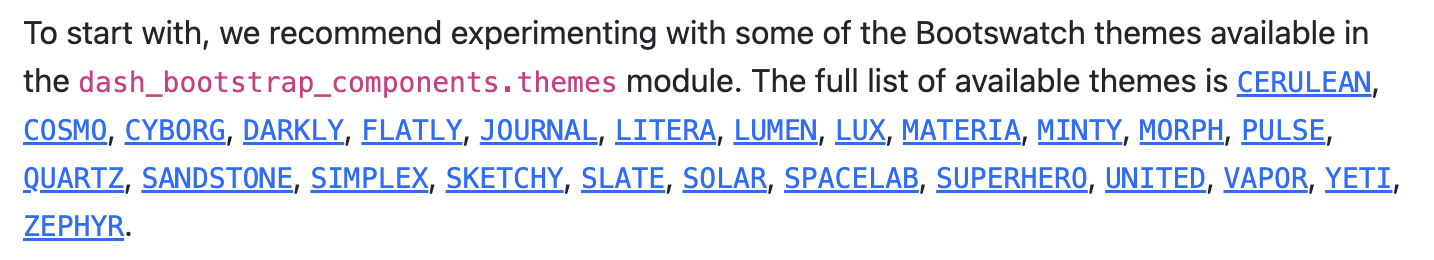

In [155]:
load_figure_template("SLATE")

# external styles link
dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

app = JupyterDash(__name__, 
                  # note this difference
                  external_stylesheets=[dbc.themes.SLATE, dbc_css] 
                 )


app.layout = html.Div(
    children=[
        html.H2(id="Header Text"),
        html.Hr(),
        html.P("Select a State Below", id='instructions'),
        dcc.Dropdown(
            options=["Alabama", "Alaska", "Arkansas"],
            value="Alabama",
            id="State Dropdown",
            # to apply themes to dcc components you need to call
            # ClassName = 'dbc' to them
            className="dbc"
        ),
        dcc.Graph(id="Revenue Line"),
        html.P("Important footnote about the data", style={"fontsize": 8})
])

@app.callback(
    Output("Header Text", "children"),
    Output("Revenue Line", "figure"),
    Input("State Dropdown", "value")
)

def plot_bar_clar(state):
    if not state:
        raise PreventUpdate
    df=education.loc[
        (education["STATE"]==state.upper()) & (education["YEAR"].between(1992, 2017))
    ]
    fig=px.line(df,x="YEAR", y="GRADES_ALL_G")

    title = f"Enrollment over time in {state.title()}"
    return title, fig

app.run_server(debug=True, mode="inline", port=8111,)

Dash is running on http://127.0.0.1:8111/



**important to note**: you can still overwrite the themes!

### Grid Based Layouts

rows and columns let you crate grids

- height of row = hieght of content EG text or graph size
- width of each col specified or distributed evenly by default

In [107]:
app = JupyterDash(__name__,  external_stylesheets=[dbc.themes.SLATE])

app.layout = dbc.Container([
    dbc.Row(
        dcc.Markdown(
        '''
        ## A Row without columns spans the whole app!
        '''
        ),
    ),
    dbc.Row(
        [
            dbc.Col(dbc.Card("Width equal if not specified")), 
            dbc.Col(dbc.Card("Because total width is 12")), 
            dbc.Col(dbc.Card("3 Cols each have width 4")), 
    ]),
    dbc.Row(
        [
            dbc.Col(dbc.Card("Width is 6"), width=6), 
            dbc.Col(dbc.Card("Width is 3"), width=3), 
            dbc.Col(dbc.Card("Width is 3"), width=3), 
        ]
    )
]) 

app.run_server(debug=True, mode="inline", port=9123)

Dash is running on http://127.0.0.1:9123/



Note the boxes around our bits of text, these are the dbc.Card() functions! These can help you see where the columns end and begin, it will help you structure!

#### Multiple Tabs

you can use either dcc.Tabs() or dcc.Tab()

'dcc.Tabs' and 'dcc.Tab' are components in the Dash framework used for creating tabbed interfaces in web applications.

**dcc.Tabs** is used to **create the container** for the tabbed interface, and it accepts a list of dcc.Tab components as its children. It provides the overall layout and behavior for the tabs, such as the style, the default tab to be displayed, and the callback to be triggered when a tab is selected.

**dcc.Tab**, on the other hand, is used to **create individual tabs** within dcc.Tabs container. It accepts a label (the text displayed on the tab) and a unique identifier for the tab (the value that is passed to the callback when the tab is selected). dcc.Tab allows for customization of the content within each individual tab, including other Dash components, such as graphs and tables.

In summary, dcc.Tabs creates the overall container for the tabbed interface, while dcc.Tab creates individual tabs and their contents within that container.

Example Below:

In [316]:

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE])

# Define the content for each tab
tab1_content = html.Div([
    html.H3('Tab 1'),
    html.P('This is the content of Tab 1')
])

tab2_content = html.Div([
    html.H3('Tab 2'),
    html.P('This is the content of Tab 2')
])


# Define the layout of the app with dcc.Tabs and dcc.Tab
app.layout = html.Div([
    dcc.Tabs(id='tabs', value='tab-1', children=[
        dcc.Tab(label='Tab 1', value='tab-1', children=tab1_content),
        dcc.Tab(label='Tab 2', value='tab-2', children=tab2_content)
    ]),
    html.Div(id='tab-content')
])

# Define the callback to display the content of the selected tab
@app.callback(Output('tab-content', 'children'),
              [Input('tabs', 'value')])
def display_tab_content(value):
    if value == 'tab-1':
        return "Displaying Tab 1"
    elif value == 'tab-2':
        return "Displaying Tab 2"

if __name__ == '__main__':
    app.run_server(debug=True, port = 9900, mode = 'inline')

Dash is running on http://127.0.0.1:9900/



In [313]:
load_figure_template("SLATE")

# external styles link
dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"


app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css])



# Load the iris dataset
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


# define the tabs in a similar manner to how you layout an individual
# dashboard

# define tab 1

tab_1 = [
    
 html.H3('Scatter Plot'),
html.Label('X-Axis'),
dcc.Dropdown(
    id='scatter-x-axis',
    options=[{'label': col, 'value': col} for col in iris.columns],
    value='sepal_length',
    className='dbc'
),
html.Label('Y-Axis'),
dcc.Dropdown(
    id='scatter-y-axis',
    options=[{'label': col, 'value': col} for col in iris.columns],
    value='sepal_width',
    className='dbc'
),
dcc.Graph(id='scatter-graph')
]


# define tab 2

tab_2 = [
    html.H3('Bar Chart'),
    html.Label('X-Axis'),
    dcc.Dropdown(
        id='bar-x-axis',
        options=[{'label': col, 'value': col} for col in iris.columns],
        value='species',
        className='dbc'
    ),
    dcc.Graph(id='bar-graph')
        ]




# Define the layout of the app with dcc.Tabs and dcc.Tab
app.layout = html.Div([
    dcc.Tabs(id='tabs', value='tab-1', className='dbc' ,children=[
        
        dcc.Tab(label='Scatter Plot', value='tab-1', 
                className='dbc', children=tab_1, 
                
               ),
        
        dcc.Tab(label='Bar Chart', value='tab-2', 
                className='dbc', children=tab_2, 
                
               )
    ], vertical = False)
])

# Define the callbacks to update the charts based on the dropdown selections
@app.callback(
    Output('scatter-graph', 'figure'),
    [Input('scatter-x-axis', 'value'),
     Input('scatter-y-axis', 'value')])
def update_scatter_graph(x_col, y_col):
    fig = px.scatter(iris, x=x_col, y=y_col, 
                     color='species', title='Scatter Plot')
    return fig


# note: you can do multiple callbacks and functions, not just 1!
@app.callback(
    Output('bar-graph', 'figure'),
    [Input('bar-x-axis', 'value')])
def update_bar_graph(x_col):
    fig = px.histogram(iris, x=x_col, 
                       color='species', title='Bar Chart')
    return fig



if __name__ == '__main__':
    
    app.run_server(debug=True, port = 9093, mode = 'inline')

Dash is running on http://127.0.0.1:9093/



#### Assignment: DBC Components

In [168]:
url = r'/Users/chrismembrey/Desktop/DS/projects/plotly_dash_course/Course_Materials/Data/European_Ski_Resorts.csv'


ski_resorts = pd.read_csv(url).drop("Unnamed: 0", axis=1)

dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css])

load_figure_template("SLATE")

app.layout = dbc.Container(
    [
        dbc.Row(
            [
                dbc.Col(width=3),
                dbc.Col(
                    html.H2(id="title", style={"text-align": "center"})
                )
            ]
        ),
        dbc.Row(
            [
                dbc.Col(
                    [
                        html.P("Select Options Below:"),
                        html.Hr(),
                        dcc.Slider(
                            id="Elevation Slider",
                            min=0,
                            max=4000,
                            step=500,
                            value=500,
                            marks={i:{"label": f'{i}m'} for i in range(0, 4001, 1000)},
                            className="dbc"
                        ),
                        html.Br(),
                        dcc.Checklist(
                            id="Feature Checklist",
                            options=["Has Snow Park", "Has Night Ski"], 
                            value=["Has Snow Park", "Has Night Ski"], 
                        )
                    ], width=4),
                dbc.Col(dbc.Card(dcc.Graph(id="graph")), width=7)
            ]
        )
    ]
)

@app.callback(
    Output('title', 'children'),
    Output('graph', 'figure'),
    Input("Elevation Slider", "value"),
    Input("Feature Checklist", "value"),
)

def plot_resort_count(elevation, features):

    ski_resorts_filtered = ski_resorts.query("HighestPoint > @elevation")
    
    title = f"Ski Resorts with Elevation Over {elevation}M Max Elevation"
    
    if features == []:
        df = (ski_resorts_filtered
              .groupby("Country", as_index=False)
              .agg(ResortCount= ("Country", "count"))
             )
    elif len(features)==2:
        df = (ski_resorts_filtered
              .query("Snowparks == 'Yes' and NightSki == 'Yes'")
              .groupby("Country", as_index=False)
              .agg(ResortCount= ("Country", "count"))
             )
    elif features == ["Has Snow Park"]:
        df = (ski_resorts_filtered
              .query("Snowparks == 'Yes'")
              .groupby("Country", as_index=False)
              .agg(ResortCount= ("Country", "count"))
             )
    else:
        df = (ski_resorts_filtered
              .query("NightSki == 'Yes'")
              .groupby("Country", as_index=False)
              .agg(ResortCount= ("Country", "count"))
             )
    fig = px.choropleth(
        df,
        locations="Country",
        color="ResortCount",
        locationmode="country names",
        scope="europe"
    ).update_geos(fitbounds="locations").update_layout(
        margin={"r":0,"t":0,"l":0,"b":0}, 
        coloraxis_colorbar_x=.85,
        geo_bgcolor="lightblue",
#         paper_bgcolor="darkblue",
        width=1000,
        height=600

    )

    return title, fig 
    
if __name__ == "__main__":
    app.run_server(debug=True, port=8315, mode='inline')

Dash is running on http://127.0.0.1:8315/



# Advanced Topics

Topics being Covered:
 - Data Tables
 - Advanced Callbacks
 - App Deployment

### Data Tables

you can embed datatables into your dash application

In [191]:
from dash import dash_table

app = JupyterDash(__name__)

app.layout = html.Div([
    
    dash_table.DataTable(
    
        columns = [{'name': i, 'id': i} for i in education.columns],
        data = education.to_dict('records'),
        filter_action = 'native',
        sort_action = 'native', 
        export_format = 'xlsx',
    )
    
])


app.run_server(mode='inline', debug = True, port = 5367)

Dash is running on http://127.0.0.1:5367/



In [196]:
from dash import dash_table

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css])


app.layout = dbc.Container([
    
    dbc.Table.from_dataframe(
    
        education,
        striped = True,
        bordered = True,
        hover = True,
        color = 'dark',
        class_name = 'dbc'
    )
    
])


app.run_server(mode='inline', debug = True, port = 1367)

Dash is running on http://127.0.0.1:1367/



in an app with callback functions, the datatable should be an output into an html.Div element

### Advanced Callback Functions

different types:
 - **Conditional** : return different components to front end depending on logic
 - **Chained** : modify options in interactive elements based on the option selected in another
 - **Cross-Filtering** : filter figues based on the data selected in another figure
 - **Manual** : prevent app updates untill user initiates callback process
 - **Periodic** : updates the app by initiating the callback process at fixed time intervals

##### conditional

<code>app.layout = html.Div([
    dcc.RadioItems(
        id="OutputPicker",
        options=["bar", "table"],
        value="bar"
    ),
    html.Div(id="Output Div")    
])</code>

<code>@app.callback(Output("Output Div", "children"), Input("OutputPicker", "value"))
def output_generator(output_style):
    if output_style == "bar":
        output = dcc.Graph(figure=px.bar(df, x="STATE", y="TOTAL_EXPENDITURE")) 
    else:
        output = dash_table.DataTable(         
    columns=[{"name": i, "id": i} for i in df.columns],
    data=df.to_dict("records"),
    style_header=style,
    style_data=style
        )
    return output  

app.run_server(debug=True, port=8283)</code>

##### Chained

example of use is a first dropdown that contains the state and the second dropdown that contains the city, the second dropdown should only contain cities within that state

In [ ]:
states_cities = {
    "California": ["Los Angeles", "San Diego", "San Francisco"],
    "Oregon": ["Bend", "Eugene", "Portland"],
    "Washington": ["Olympia", "Spokane", "Seattle"],
}

app.layout= html.Div([
    dcc.Dropdown(
        id="state-dropdown", 
        options=["California", "Oregon", "Washington"], 
        value="California",
        className="dbc"
    ),
    dcc.Dropdown(id="city-dropdown", value="Los Angeles", className="dbc"),
    dbc.Card(id="text-output")
])

@app.callback(
    # notice the 'options' below!
    Output("city-dropdown", "options"), 
    Input("state-dropdown", "value"))
def set_metrics_options(selected_state):
    return states_cities[selected_state]

@app.callback(
    Output("text-output", "children"),
    Input("city-dropdown", "value"))
def plot_bar(city):
    if not city:
        raise PreventUpdate
    return f"You have selected {city}!"

##### Cross-Filtering

this uses chart selections as inputs to callbacks that filter other charts

In [209]:
from dash.exceptions import PreventUpdate

dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css])

load_figure_template("SLATE")

education = (education
             .rename({
                 "AVG_MATH_4_SCORE": "4th Gr. Math",
                 "AVG_MATH_8_SCORE": "8th Gr. Math",
                 "AVG_READING_4_SCORE": "4th Gr. Reading",
                 "AVG_READING_8_SCORE": "8th Gr. Reading"
             }, axis=1)
             .assign(expenditure_per_student=lambda x: x["TOTAL_EXPENDITURE"]/x["GRADES_ALL_G"])
)


app.layout = html.Div([
    dbc.Row(html.H1("Education Performance and Expenditure in the US", style={"text-align": "center"})),
    dbc.Row([
       dbc.Col([
           dbc.Card([
           dcc.Markdown("Select an X Column"),
           dcc.RadioItems(
               id="score-radio",
               options=["4th Gr. Math", "8th Gr. Math", "4th Gr. Reading", "8th Gr. Reading"], 
               value="8th Gr. Math"
           ),
           html.Hr(),
           dcc.Markdown("Select a Y Column"),
           dcc.RadioItems(
                id="score-radio2",
                options=["4th Gr. Math", "8th Gr. Math", "4th Gr. Reading", "8th Gr. Reading"],
                value="8th Gr. Reading"
           )])
       ], width=2),
        dbc.Col(
            dcc.Graph(id="cross-filter-scatter", 
                      # note how we start the hovering data with california, this means
                      # our line chart below will start with california
                      hoverData={'points': [{'customdata': ['TEXAS']}]})
        ),
        dbc.Col(dcc.Graph(id="x-line"))
    ])
])
@app.callback(
    Output("cross-filter-scatter", "figure"),
    Input("score-radio", "value"),
    Input("score-radio2", "value"))
def score_scatter(x, y):
    fig = px.scatter(
        education.query("YEAR == 2013"),
        x=x,
        y=y,
        hover_name="STATE",
        # here we have specifically mentioned the custom data to be state which is why
        # {'points': [{'customdata': ['CALIFORNIA']}]}) works
        custom_data=["STATE"]
    )
        
    return fig

    
@app.callback(
    Output("x-line", "figure"),
    Input("cross-filter-scatter", "hoverData"))
def update_line(hoverData):
    
    # takes in the current hover state as input from the cross-filter-scatter
    state_name = hoverData["points"][0]["customdata"][0]
    df=education.query("STATE == @state_name")
    
    fig = px.line(
        df,
        x="YEAR",
        y="expenditure_per_student",
        title=f"Expenditure Per Student in {state_name.title()}"
    ).update_xaxes(showgrid=False)
    
    return fig
    

if __name__ == "__main__":
    app.run_server(debug=True, port=8251)

Dash is running on http://127.0.0.1:8251/

Dash app running on http://127.0.0.1:8251/


In Plotly Dash, the **customdata** argument in plots allows you to **attach additional** data to each point on a scatter plot or a similar plot type. This additional data can be used to provide more context to the user when they interact with the plot, such as displaying additional information about a data point when the user hovers over it with the mouse.

The **customdata** argument can take a **list of values or an array of values** for each point in the plot. These values can be any type of data that you want to associate with each point, such as numerical values, categorical labels, or even more complex objects like dictionaries or lists.

When you define a customdata array for a plot, it becomes available in the hover_data property of the fig.update_traces method. This allows you to specify which values should be displayed in the tooltip that appears when the user hovers over a data point. You can also use the customdata property to create custom interactions with the plot, such as highlighting related points when the user clicks on a data point that has a specific value in the customdata array.

In [ ]:
# example of customdata below
import plotly.express as px
import pandas as pd

# Load some example data
df = pd.read_csv("example_data.csv")

# Define the scatter plot
fig = px.scatter(df, x="x_values", y="y_values", color="category", custom_data=["name", "description"])

# Update the hover data to display the name and description fields
fig.update_traces(hovertemplate="<br>".join(["Name: %{customdata[0]}", "Description: %{customdata[1]}"]))

# Display the plot in a Dash app
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id="scatter-plot",
        figure=fig
    )
])

if __name__ == "__main__":
    app.run_server(debug=True)


##### Manual Callbacks

use a button component to your app that run callbacks manually allowing users to make multiple selection before applying any updates

example is having a toggle for number of clusters in kmeans clustering, you want to choose the cluster number than then decide if you want to run that interactive element

In [213]:
dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css])

load_figure_template("SLATE")

education = (education
             .rename({
                 "AVG_MATH_4_SCORE": "4th Gr. Math",
                 "AVG_MATH_8_SCORE": "8th Gr. Math",
                 "AVG_READING_4_SCORE": "4th Gr. Reading",
                 "AVG_READING_8_SCORE": "8th Gr. Reading"
             }, axis=1)
             .assign(expenditure_per_student= lambda x: x["TOTAL_EXPENDITURE"]/x["GRADES_ALL_G"])
)


app.layout = html.Div([
    dbc.Row(html.H1("Education Performance and Expenditure in the US", style={"text-align": "center"})),
    dbc.Row([
       dbc.Col([
           dbc.Card([
               dcc.Markdown("Select an X Column"),
               dcc.RadioItems(
                   id="score-radio",
                   options=["4th Gr. Math", "8th Gr. Math", "4th Gr. Reading", "8th Gr. Reading"], 
                   value="8th Gr. Math"
               ),
               html.Hr(),
               dcc.Markdown("Select a Y Column"),
               dcc.RadioItems(
                    id="score-radio2",
                    options=["4th Gr. Math", "8th Gr. Math", "4th Gr. Reading", "8th Gr. Reading"],
                    value="8th Gr. Reading"
               ),
               # submit button adding the number of clicks which is set to 'none'
               html.Button("Submit", id="submit-button", n_clicks = None)])
       ], width=2),
        dbc.Col(dcc.Graph(id="cross-filter-scatter", 
                          hoverData={'points': [{'customdata': ['CALIFORNIA']}]}), width=5),
        dbc.Col(dcc.Graph(id="x-line"), width=5)
    ])
])

@app.callback(
    Output("cross-filter-scatter", "figure"),
    # send the number of clicks - which in this case is 'None' back to
    # the button so that one click continously does the job
    # for us
    Output("submit-button", "n_clicks"),
    Input("score-radio", "value"),
    Input("score-radio2", "value"),
    Input("submit-button", "n_clicks")
)
def score_scatter(x, y, n_clicks):
    # if no clicks given, prevent the update
    # this is why no plot is produced when there isnt
    if not n_clicks:
        raise PreventUpdate
    fig = px.scatter(
        education.query("YEAR == 2013"),
        x=x,
        y=y,
        hover_name="STATE",
        custom_data=["STATE"],
        # note the njumber of clicks in the title!
        title=f"{n_clicks}"
    ) 
    # setting the n_clicks of the button back to none so that
    # if the button is re-pressed we start the process again
    # if we dont have this in place then the number of clicks continues
    # to go up
    n_clicks = None
    return fig, n_clicks


def create_line_chart(df, state_name):
    
    fig = px.line(
        df, x="YEAR", 
        y="expenditure_per_student",
        title=f"Expenditure Per Student in {state_name.title()}"
    )
        
    fig.update_xaxes(showgrid=False)
    
    return fig
    
@app.callback(
    Output("x-line", "figure"),
    Input("cross-filter-scatter", "hoverData"))
def update_line(hoverData):
    state_name = hoverData["points"][0]["customdata"][0]
    df=education.query("STATE == @state_name")
    return create_line_chart(df, state_name)
    

if __name__ == "__main__":
    app.run_server(debug=True,mode="inline", port=8260)


Dash is running on http://127.0.0.1:8260/



##### Periodic Callbacks

These call backs update on a time period (useful for when connected to live data souce)

<code>dcc.Interval(interval, n_intervals)</code>

In [215]:
dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css])

load_figure_template("SLATE")

from numpy.random import default_rng
rng = default_rng(2023)

app.layout = html.Div([
    dbc.Row(html.H1("Normal Distribution Simulator", style={"text-align": "center"})),
    dbc.Row(dbc.Col(dcc.Graph(id="random-data-scatter"))),
    
    # interval updates every 1000 mili seconds (1000 = 1 second)
    dcc.Interval(id="refresh-data-interval", interval=1000, n_intervals=0)
])

@app.callback(
    Output("random-data-scatter", "figure"),
    # note the input takes 'n_intevals'
    Input("refresh-data-interval", "n_intervals")
)

def rand_hist(n_intervals):
    # every n_intervals, this will change at a rate of interval
    mean, stddev = 100, 10
    fig = px.histogram(
        x=rng.normal(mean, stddev, size=100),
        title=f"Random Histogram has run {n_intervals} times"
    )
    return fig


if __name__ == "__main__":
    app.run_server(debug=True, mode="inline", port=8260)

Dash is running on http://127.0.0.1:8260/



###### Finnhub API

In [273]:
import finnhub
from dotenv import load_dotenv
import os

dotenv_path = 'Secrets/.env'

load_dotenv(dotenv_path)

api_key = os.getenv('API_KEY')

finnhub_client = finnhub.Client(api_key=api_key)

ticker = 'GSK'

print(finnhub_client.quote(ticker))

{'c': 36.675, 'd': 0.215, 'dp': 0.5897, 'h': 36.69, 'l': 36.56, 'o': 36.84, 'pc': 36.46, 't': 1682084619}


In [274]:
# app

from datetime import datetime, date

dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css])


finnhub_client = finnhub.Client(api_key=api_key)

load_figure_template("SLATE")

stock_df = pd.DataFrame(finnhub_client.quote(ticker), index=[0])

def append_row(dataframe):
    row = finnhub_client.quote(ticker)
    temp_df = pd.DataFrame(row, index=[0])
    merged_df = pd.concat([dataframe, temp_df]).reset_index(drop= True)
    return merged_df


app.layout = html.Div([
    dbc.Row(html.H1("Real-Time Stock Tracker", style={"text-align": "center"})),
    dbc.Row(dbc.Col(dcc.Graph(id="stock-price-line"))),
    dcc.Interval(id="refresh-data-interval", interval=2000)
])

@app.callback(
    Output("stock-price-line", "figure"),
    Input("refresh-data-interval", "n_intervals")
)


def stock_line(n_intervals):
    
    global stock_df
    
    stock_df = append_row(stock_df)
    
    fig = px.line(
        (stock_df
         .assign(t = pd.to_datetime(stock_df["t"], unit="s"))
         .rename({"c": "Price"}, axis=1)
        ),
        x="t",
        y="Price",
        title=f"{ticker} Stock Price as of {datetime.now()}"
    ).update_layout({"title": {"x": .5}})
    
    
    return fig


if __name__ == "__main__":
    app.run_server(debug=True, port=8260)

Dash is running on http://127.0.0.1:8260/

Dash app running on http://127.0.0.1:8260/


### Assignment: Advanced Callbacks

In [283]:
url = r"/Users/chrismembrey/Desktop/DS/projects/plotly_dash_course/Course_Materials/Data/Ski Resorts/resorts.csv"
resorts = pd.read_csv(url, encoding = 'iso-8859-1')
resorts.head(5)


ID                        Resort   Latitude   Longitude  Country   
0   1                      Hemsedal  60.928244    8.383487   Norway  \
1   2              Geilosiden Geilo  60.534526    8.206372   Norway   
2   3                          Golm  47.057810    9.828167  Austria   
3   4  Red Mountain Resort-Rossland  49.105520 -117.846280   Canada   
4   5                       Hafjell  61.230369   10.529014   Norway   

       Continent  Price            Season  Highest point  Lowest point  ...   
0         Europe     46    November - May           1450           620  ...  \
1         Europe     44  November - April           1178           800  ...   
2         Europe     48  December - April           2110           650  ...   
3  North America     60  December - April           2075          1185  ...   
4         Europe     45  November - April           1030           195  ...   

   Snow cannons  Surface lifts  Chair lifts  Gondola lifts  Total lifts   
0           325             15            6              0           21  \
1           100             18            6              0           24   
2           123              4            4              3           11   
3             0              2            5              1            8   
4           150             14            3              1           18   

   Lift capacity  Child friendly  Snowparks  Nightskiing  Summer skiing  
0          22921             Yes        Yes          Yes             No  
1          14225             Yes        Yes          Yes             No  
2          16240             Yes         No           No             No  
3           9200             Yes        Yes          Yes             No  
4          21060             Yes        Yes          Yes             No  

[5 rows x 25 columns]

In [289]:
# we need a metric that lets us have an idea of how busy
# the slopes will be. That metric will be the ratio of lift capacity 
# to total slopes. 

# this assumes  that lift capacity == number of people on the slopes or is 
# proportional too this number


resorts['slope_population_density'] = round(resorts['Lift capacity'] / resorts['Total slopes'], 2)

In [310]:
dbc_css = "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates/dbc.min.css"


app = JupyterDash(__name__, external_stylesheets=[dbc.themes.SLATE, dbc_css])


app.layout = html.Div([
    html.H1(id='app-header', className = 'dbc'),
    html.P('Choose a Country Below', className = 'dbc'),
    
    dcc.Dropdown(
    
        id='country-dropdown', 
        options = resorts['Country'].unique(),
        value = 'Andorra',
        className = 'dbc'
    ),
    
    
    dcc.Slider(
    
        id='elevation-slider',
        min = 0,
        max = 5000,
        step = 500,
        marks = {
            
            i : {
                'label': f'{i}m',
                'style': {'color': 'lightgrey'}
            } for i in range(0,5500, 500)
        },
        className = 'dbc',
        value = 0
    ),
    
    
    
    dcc.Checklist(
    
        id='bar-chart-checklist',
        options = ['Bar Chart'],
        value = [], # unchecked
        className = 'dbc'
    ),
    
    html.Button(
        children = 'Process',
        id='checklist-confirm-button',
        n_clicks = None,
        className = 'dbc'
    
    ),
    
    html.Div(id='chart-or-table', className = 'dbc')
    
], className = 'dbc')



@app.callback(

    Output('chart-or-table', 'children'),
    Output('app-header', 'children'),
    Output('checklist-confirm-button', 'n_clicks'),
    Input('bar-chart-checklist', 'value'),
    Input('checklist-confirm-button', 'n_clicks'),
    Input('country-dropdown', 'value'),
    Input('elevation-slider', 'value')
)
def create_app(checklist , n_clicks, country, elevation):
    
    
    title = f'Ski Resorts in {country} with Peaks above {elevation}M'
    
    if not n_clicks:
        
        # have the choice to prevent update of just return 
        #'none' values with the first country
        
#         raise PreventUpdate
        
        return None , title, None
        
    country_resort = resorts.query("Country == @country")
    country_elevation = country_resort.loc[
        (country_resort['Highest point'] >= elevation)]
    
    
    
    if checklist == ['Bar Chart']:
        
        fig = px.bar(
            
            country_elevation,
            x = 'Resort',
            y = 'slope_population_density',
            title = f'Population Density of Resorts in {country}'
        
        )
        
        
        result = dcc.Graph(id='bar', figure = fig, className = 'dbc')
        
    else:
        
        result = dash_table.DataTable(
    
        columns = [{'name': i, 'id': i} for i in country_elevation.columns],
        data = country_elevation.to_dict('records'),
        filter_action = 'native',
        sort_action = 'native', 
        export_format = 'xlsx',
    )
    
    
    
    n_clicks = None
    
    
    return result , title, n_clicks




app.run_server(debug = True, port=1111, mode='inline')



Dash is running on http://127.0.0.1:1111/

